![Logo_Conestoga](https://upload.wikimedia.org/wikipedia/commons/3/34/Conestoga_College_logo.png)

Artificial Intelligence for Business Decisions and Transformation 
&nbsp; 

CSCN8030 - Spring 2024 - Section 2
&nbsp; 

Professor: Glaucia Melo dos Santos, PhD
&nbsp;

Group 4 - Members:<br>

Krishna Kumar, Hemasree<br>
Shijin, Jency<br>
Fernandez, Arcadio<br>

## **Sprint 6  Development:**

# **Project: GoodLife  - Enhancing Utilization of Fitness Classes and Gym Equipment**

# 1. A brief introduction to the problem

## 1.1. Project Overview:

This project aims to **enhance the utilization of fitness classes and gym equipment at GoodLife Fitness** by developing predictive models and optimization strategies. For fitness classes, the goal is to predict whether a member will attend a booked class, allowing for dynamic adjustments in class availability to maximize attendance and client satisfaction. For gym equipment utilization, the project seeks to predict crowd levels at various times of the day using historical data and additional features like weather and holidays. By accurately forecasting gym occupancy, we can devise strategies to better manage crowd levels, ensuring a more comfortable experience for members and improving overall facility usage.

#### A. Optimizing Group Fitness Class Utilization <br>
GoodLife offers a range of fitness classes in two capacities - 25 and 15.
Some classes are always fully booked. Fully booked classes often have a low attendance rate.<br>
GoodLife wants to increase the number of spaces available for classes.
They want to do this by predicting whether the member will attend the class or not.<br>
If they can predict a member will not attend the class, they can make another space available.<br>

Label:<br>
- booking_id - Nominal. The unique identifier of the booking.
- months_as_member - Discrete. The number of months as this fitness club member, minimum 1 month.
- weight -Continuous. The member's weight in kg, rounded to 2 decimal places.
- days_before - Discrete. The number of days before the class the member registered,
- day_of_week - Nominal. The day of the week of the class.
- time - Ordinal. The time of day of the class. Either AM or PM
- category - Nominal. The category of the fitness class.
- attended - Nominal. Whether the member attended the class (1) or not (0)


#### B. Optimizing Gym Equipment Utilization based<br> 
GoodLife has measured how many people were in this gym once every 10 minutes over the last year. We want to be able to predict how crowded the gym will be in the future so that we can persuade people to use the facilities when its not crowded.<br>
The dataset consists of 26,000 people counts (about every 10 minutes) over the last year. In addition, I gathered extra info including weather and semester-specific information that might affect how crowded it is. The label is the number of people, which I'd like to predict given some subset of the features.<br>
1.	Given a time of day (and maybe some other features, including weather), predict how crowded the gym will be.<br>
2.	Figure out which features are actually important, which are redundant, and what features could be added to make the predictions more accurate.<br>

Label:<br>
- Number of people
Features:
- date (string; datetime of data)
- timestamp (int; number of seconds since beginning of day)
- day_of_week (int; 0 [monday] - 6 [sunday])
- is_weekend (int; 0 or 1) [boolean, if 1, it's either saturday or sunday, otherwise 0]
- is_holiday (int; 0 or 1) [boolean, if 1 it's a federal holiday, 0 otherwise]
- temperature (float; degrees fahrenheit)
- is_start_of_semester (int; 0 or 1) [boolean, if 1 it's the beginning of a school semester, 0 otherwise]
- month (int; 1 [jan] - 12 [dec])
- hour (int; 0 - 23)


# 2. Libraries and data

## 2.1 Importing the libraries

In [554]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## 2.2. Obtaining the Data

In [555]:
df_class_util = pd.read_csv("Data\problem2.csv")
df_equipment_util = pd.read_csv("Data\problem1.csv")

### A. Group Fitness Class Utilization 

In [556]:
display(df_class_util)

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0


### B. Gym Equipment Utilization based

In [557]:
display(df_equipment_util)

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...,...,...,...
62179,23,2017-03-18 18:42:28-07:00,67348,5,1,0,61.07,0,1,3,18
62180,21,2017-03-18 18:52:35-07:00,67955,5,1,0,61.07,0,1,3,18
62181,25,2017-03-18 19:02:40-07:00,68560,5,1,0,56.71,0,1,3,19
62182,18,2017-03-18 19:12:47-07:00,69167,5,1,0,56.71,0,1,3,19


# 3.Data Pre-processing

Performing Data cleaning by handling missing values, correcting data types, and ensuring data consistency.

## 3.1. Checking Data Types for each dataset

In [558]:
df = pd.DataFrame(df_class_util)

# Checking the data types of each column
print("Data Types in the DataFrame:")
print(df.dtypes)

Data Types in the DataFrame:
booking_id            int64
months_as_member      int64
weight              float64
days_before          object
day_of_week          object
time                 object
category             object
attended              int64
dtype: object


In [559]:
df = pd.DataFrame(df_equipment_util)

# Checking the data types of each column
print("Data Types in the DataFrame:")
print(df.dtypes)

Data Types in the DataFrame:
number_people             int64
date                     object
timestamp                 int64
day_of_week               int64
is_weekend                int64
is_holiday                int64
temperature             float64
is_start_of_semester      int64
is_during_semester        int64
month                     int64
hour                      int64
dtype: object


## 3.2. Checking for Missing values

In [560]:
df = pd.DataFrame(df_class_util)

# Check for missing values
missing_values = df.isnull().sum()

# Print the results
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64


In [561]:
# Check unique values in the 'category' column
unique_categories = df_class_util['category'].unique()
print("Unique categories in the 'category' column:", unique_categories)


Unique categories in the 'category' column: ['Strength' 'HIIT' 'Cycling' 'Yoga' '-' 'Aqua']


In [562]:
df = pd.DataFrame(df_equipment_util)

# Check for missing values
missing_values = df.isnull().sum()

# Print the results
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64


## 3.3. Handling missing values, correct data types, and ensure data consistency

### A. Group Fitness Class Utilization

In [563]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_class_util' is your DataFrame

# Step 1: Normalize day_of_week column
day_map = {
    'Monday': 'Mon', 'Mon': 'Mon',
    'Tuesday': 'Tue', 'Tue': 'Tue',
    'Wednesday': 'Wed', 'Wed': 'Wed',
    'Thursday': 'Thu', 'Thu': 'Thu',
    'Friday': 'Fri', 'Fri.': 'Fri', 'Fri': 'Fri',
    'Saturday': 'Sat', 'Sat': 'Sat',
    'Sunday': 'Sun', 'Sun': 'Sun'
}

df_class_util['day_of_week'] = df_class_util['day_of_week'].map(day_map)

# Step 2: Define the correct order for the days
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_class_util['day_of_week'] = pd.Categorical(df_class_util['day_of_week'], categories=weekday_order, ordered=True)

# Step 3: Normalize 'category' column
# Check unique values in the 'category' column
unique_categories = df_class_util['category'].unique()
print("Unique categories before normalization:", unique_categories)

# Replace '-' with NaN (or you could assign it to a specific category if appropriate)
df_class_util['category'].replace('-', None, inplace=True)

# Drop rows where 'category' is NaN (originally '-')
df_class_util.dropna(subset=['category'], inplace=True)

# Example: Normalize categories (this might change based on what inconsistencies you find)
# You can map incorrect values to the correct category names
category_map = {
    'Strength': 'Strength', 'Hiit': 'HIIT', 'Cycling': 'Cycling', 'Yoga': 'Yoga',
    'Aquatics': 'Aqua', 'Water': 'Aqua', 'Spinning': 'Cycling', 'HIIT': 'HIIT', 
    'strength': 'Strength', 'Aqua': 'Aqua', 'Spin': 'Cycling'
}

df_class_util['category'] = df_class_util['category'].map(category_map)

# Re-check the unique values after normalization
unique_categories_after = df_class_util['category'].unique()
print("Unique categories after normalization:", unique_categories_after)

# After pre-processing, save the cleaned DataFrame to a new variable
df_class_util_pre = df_class_util.copy()

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
display(df_class_util_pre.head())

# Checking data types 
print("\nData Types after cleaning:")
print(df_class_util_pre.dtypes)



Unique categories before normalization: ['Strength' 'HIIT' 'Cycling' 'Yoga' '-' 'Aqua']
Unique categories after normalization: ['Strength' 'HIIT' 'Cycling' 'Yoga' 'Aqua']

Cleaned DataFrame:


C:\Temp\ipykernel_6660\316571747.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_class_util['category'].replace('-', None, inplace=True)


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0



Data Types after cleaning:
booking_id             int64
months_as_member       int64
weight               float64
days_before           object
day_of_week         category
time                  object
category              object
attended               int64
dtype: object


### B. Gym Equipment Utilization based

In [564]:
import pandas as pd

# Step 1: Correcting Data Types and Handling Invalid Dates
# Convert 'date' to datetime format and drop rows with invalid dates
df_equipment_util['date'] = pd.to_datetime(df_equipment_util['date'], errors='coerce')
df_equipment_util_pre = df_equipment_util.dropna(subset=['date']).copy()

# Step 2: Convert numeric day_of_week to string labels if necessary
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df_equipment_util_pre['day_of_week'] = df_equipment_util_pre['day_of_week'].replace(day_map)

# Define the custom order for days of the week and convert 'day_of_week' to categorical
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_equipment_util_pre.loc[:, 'day_of_week'] = pd.Categorical(df_equipment_util_pre['day_of_week'], categories=weekday_order, ordered=True)

# Check if 'time' column exists and sort accordingly
if 'time' in df_equipment_util_pre.columns:
    df_equipment_util_pre_sorted = df_equipment_util_pre.sort_values(by=['day_of_week', 'time']).reset_index(drop=True)
else:
    df_equipment_util_pre_sorted = df_equipment_util_pre.sort_values(by=['day_of_week']).reset_index(drop=True)

# Step 3: Handle 'is_holiday' issues
# Check if 'is_holiday' column contains any non-numeric values or NaN values
if 'is_holiday' in df_equipment_util_pre.columns:
    # Convert 'is_holiday' to numeric (binary) if it's not already
    df_equipment_util_pre['is_holiday'] = pd.to_numeric(df_equipment_util_pre['is_holiday'], errors='coerce')
    
    # Fill any NaN values in 'is_holiday' with 0 (assuming 0 means not a holiday)
    df_equipment_util_pre['is_holiday'].fillna(0, inplace=True)
    
    # Convert to integer type
    df_equipment_util_pre['is_holiday'] = df_equipment_util_pre['is_holiday'].astype(int)

# After pre-processing, save the cleaned DataFrame to a new variable
df_equipment_util_pre = df_equipment_util_pre_sorted.copy()

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
display(df_equipment_util_pre.head())

# Checking data types again to confirm the changes
print("\nData Types after cleaning:")
print(df_equipment_util_pre.dtypes)


Cleaned DataFrame:


C:\Temp\ipykernel_6660\452843845.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_equipment_util['date'] = pd.to_datetime(df_equipment_util['date'], errors='coerce')
C:\Temp\ipykernel_6660\452843845.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,Fri,0,0,71.76,0,0,8,17
1,45,2015-11-13 09:00:14-08:00,32414,Fri,0,0,56.34,0,1,11,9
2,45,2015-11-13 09:20:12-08:00,33612,Fri,0,0,56.34,0,1,11,9
3,43,2015-11-13 09:30:13-08:00,34213,Fri,0,0,56.34,0,1,11,9
4,50,2015-11-13 09:40:13-08:00,34813,Fri,0,0,56.34,0,1,11,9



Data Types after cleaning:
number_people             int64
date                     object
timestamp                 int64
day_of_week              object
is_weekend                int64
is_holiday                int64
temperature             float64
is_start_of_semester      int64
is_during_semester        int64
month                     int64
hour                      int64
dtype: object


# 4. Exploratory Data Analysis

### 4.A. Group Fitness Class Utilization

#### 4.A.1. Summary Statistics

In [565]:
# Summary statistics for numerical columns
display(df_class_util_pre.describe())

# Summary statistics for categorical columns
display(df_class_util_pre.describe(include=['object']))


,booking_id,months_as_member,weight,attended
count,1487.000000,1487.000000,1467.000000,1487.000000
mean,749.751177,15.633490,82.622379,0.303968
std,433.356731,12.932355,12.781539,0.460124
min,1.000000,1.000000,55.410000,0.000000
25%,373.500000,8.000000,73.490000,0.000000
50%,751.000000,12.000000,80.760000,0.000000
75%,1124.500000,19.000000,89.520000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


,days_before,time,category
count,1487,1487,1487
unique,31,2,5
top,10,AM,HIIT
freq,289,1130,667


#### 4.A.2. Distribution of Numerical Variables

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


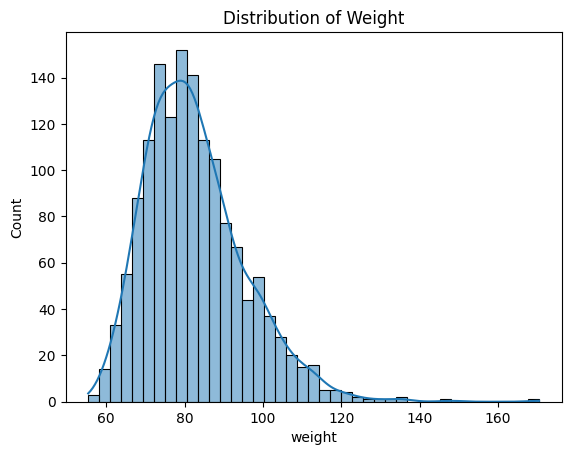

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


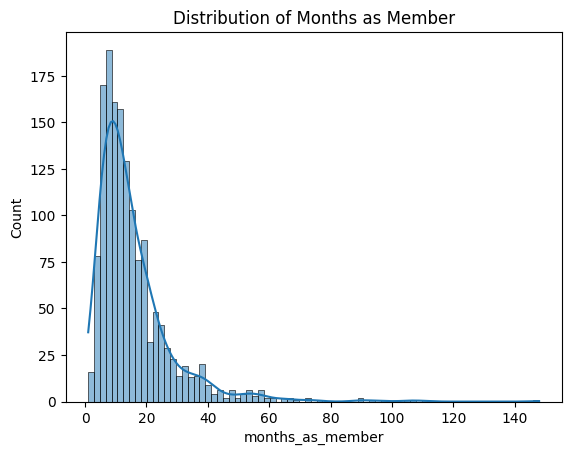

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


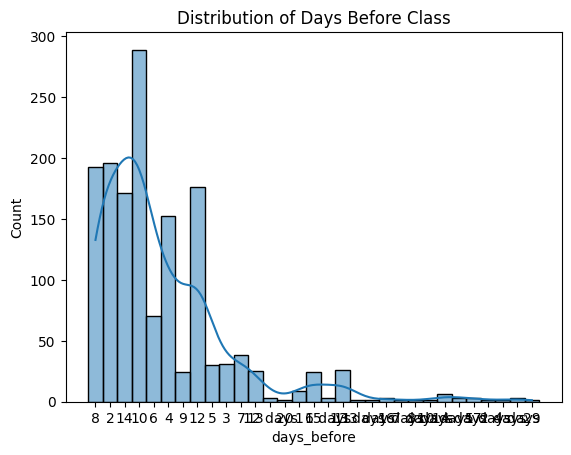

In [566]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of 'weight'
sns.histplot(df_class_util_pre['weight'], kde=True)
plt.title('Distribution of Weight')
plt.show()

# Distribution of 'months_as_member'
sns.histplot(df_class_util_pre['months_as_member'], kde=True)
plt.title('Distribution of Months as Member')
plt.show()

# Distribution of 'days_before'
sns.histplot(df_class_util_pre['days_before'], kde=True)
plt.title('Distribution of Days Before Class')
plt.show()



#### 4.A.3. Count Plots for Categorical Variables

c:\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


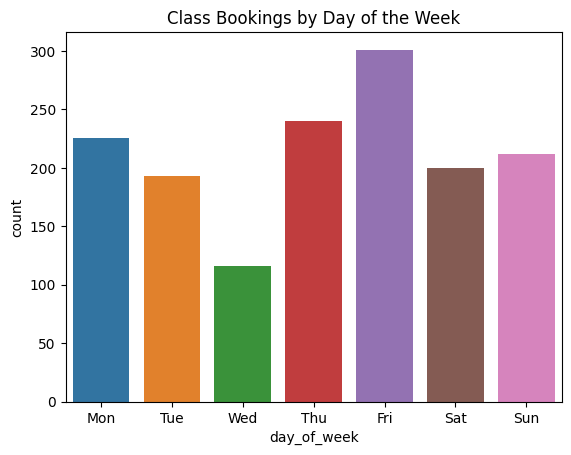

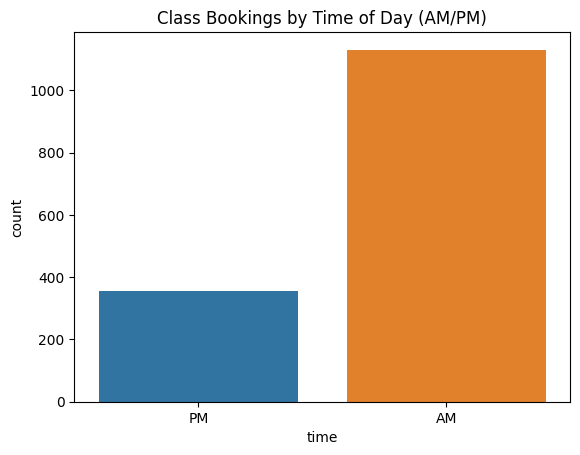

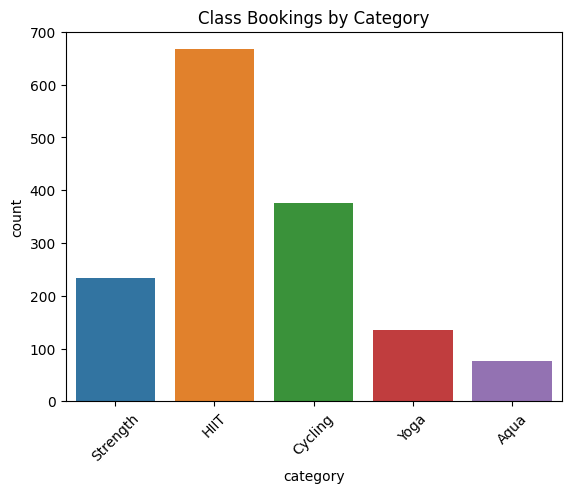

In [567]:
# Count plot for 'day_of_week'
sns.countplot(x='day_of_week', data=df_class_util_pre)
plt.title('Class Bookings by Day of the Week')
plt.show()

# Count plot for 'time'
sns.countplot(x='time', data=df_class_util_pre)
plt.title('Class Bookings by Time of Day (AM/PM)')
plt.show()

# Count plot for 'category'
sns.countplot(x='category', data=df_class_util_pre)
plt.title('Class Bookings by Category')
plt.xticks(rotation=45)
plt.show()


#### 4.A.4. Correlation Matrix
A correlation matrix helps to identify relationships between numerical variables.

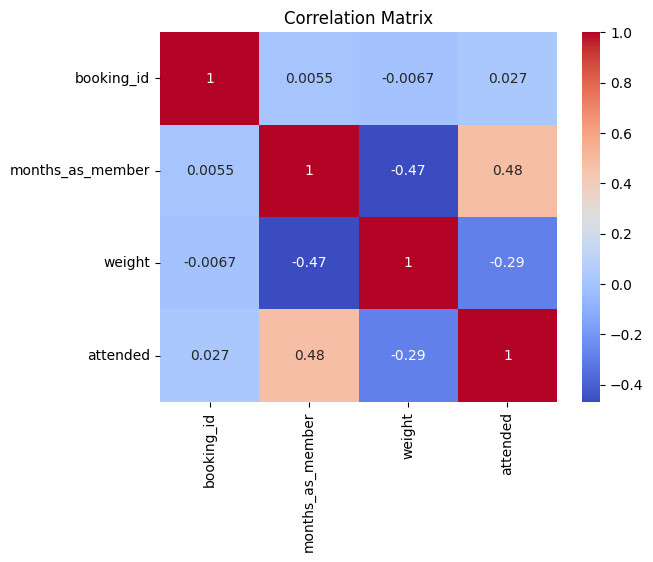

In [568]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation
numerical_cols = df_class_util_pre.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numerical_cols.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### 4.A.5. Attendance Rate Analysis

C:\Temp\ipykernel_6660\1817147113.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attendance_rate_by_day = df_class_util_pre.groupby('day_of_week')['attended'].mean()


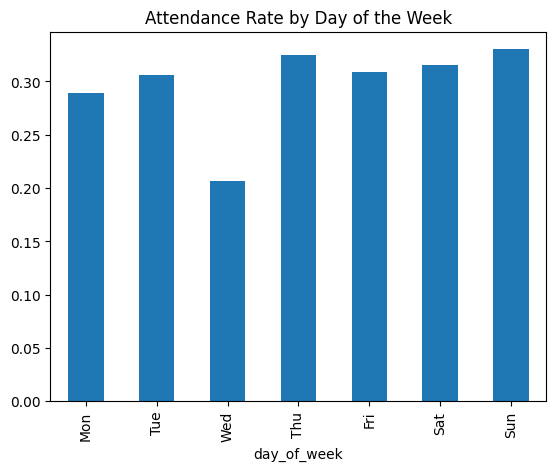

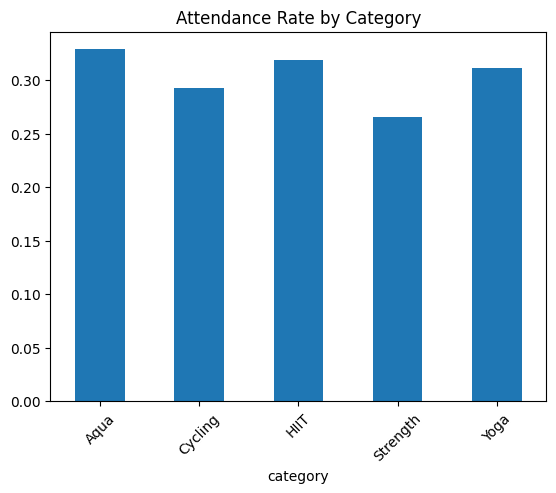

In [569]:
# Attendance rate by day_of_week
attendance_rate_by_day = df_class_util_pre.groupby('day_of_week')['attended'].mean()
attendance_rate_by_day.plot(kind='bar')
plt.title('Attendance Rate by Day of the Week')
plt.show()

# Attendance rate by category
attendance_rate_by_category = df_class_util_pre.groupby('category')['attended'].mean()
attendance_rate_by_category.plot(kind='bar')
plt.title('Attendance Rate by Category')
plt.xticks(rotation=45)
plt.show()


#### 4.A.6. Pair Plot

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future versi

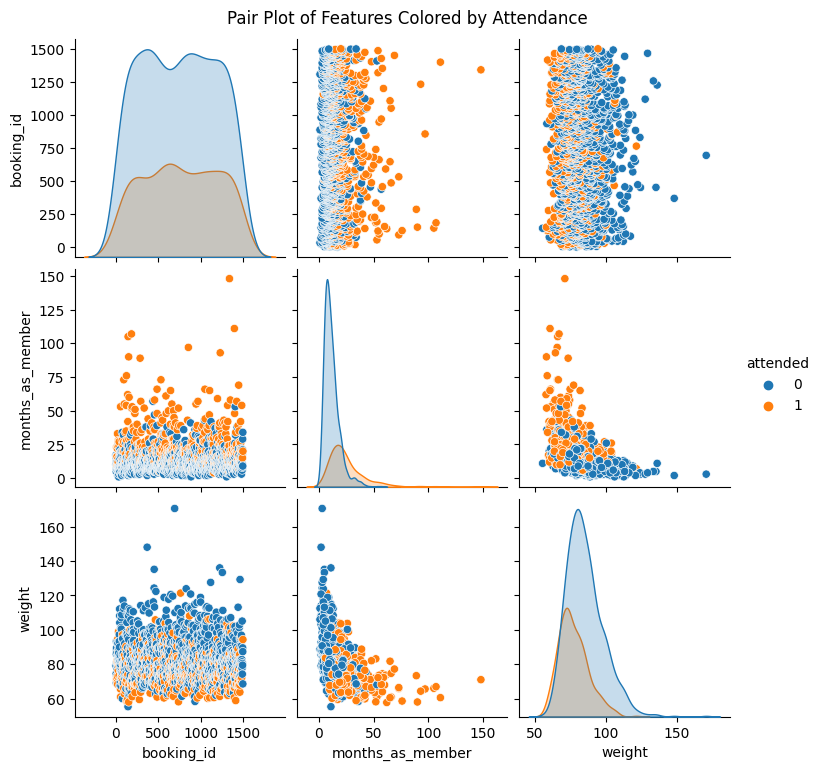

In [570]:
sns.pairplot(df_class_util_pre, hue='attended')
plt.suptitle('Pair Plot of Features Colored by Attendance', y=1.02)
plt.show()


### 4.B. Gym Equipment Utilization based

#### 4.B.1. Summary statistics

In [571]:

print("\nSummary statistics:")
display(df_equipment_util_pre.describe())


Summary statistics:


,number_people,timestamp,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


#### 4.B.2. Distribution of 'number_people'

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


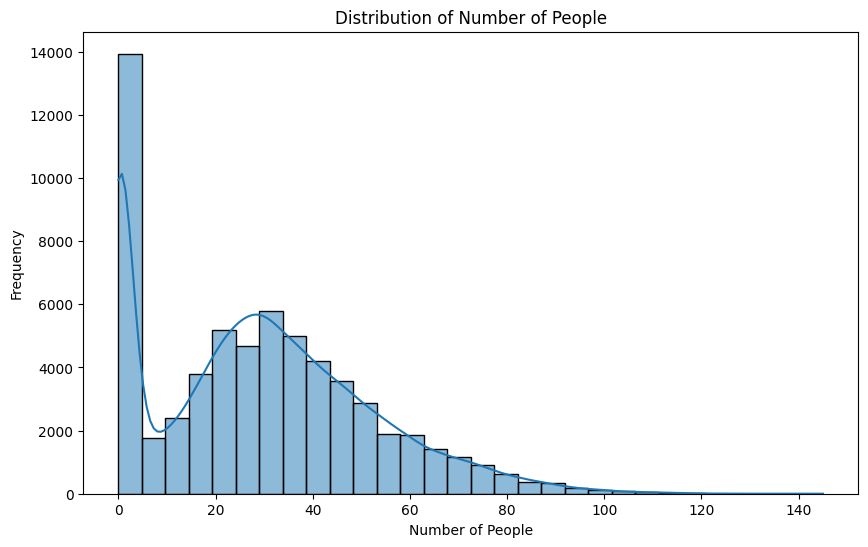

In [572]:

plt.figure(figsize=(10, 6))
sns.histplot(df_equipment_util_pre['number_people'], kde=True, bins=30)
plt.title('Distribution of Number of People')
plt.xlabel('Number of People')
plt.ylabel('Frequency')
plt.show()

#### 4.B.3. Boxplot of 'number_people' across 'day_of_week'

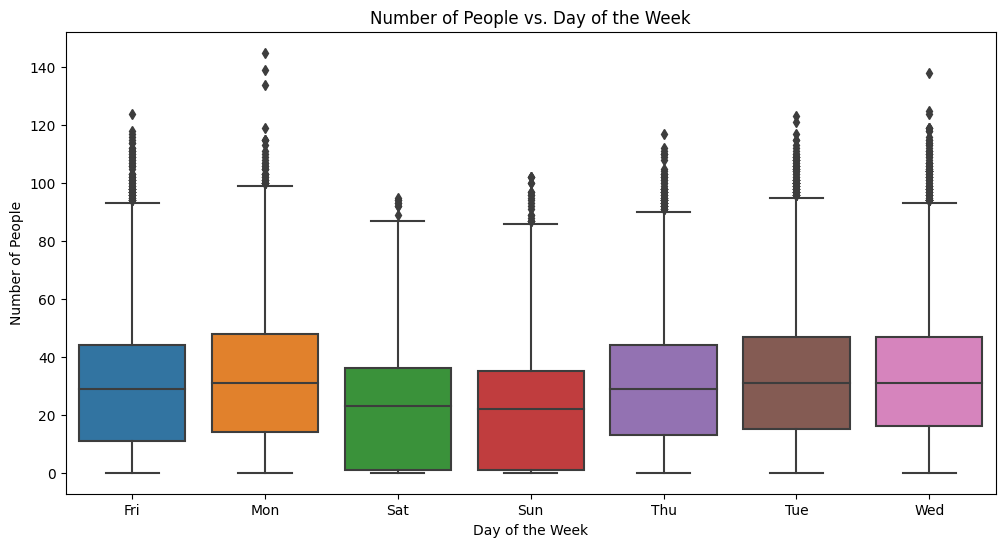

In [573]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='number_people', data=df_equipment_util_pre)
plt.title('Number of People vs. Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of People')
plt.show()

#### 4.B.4. Correlation matrix excluding non-numeric columns

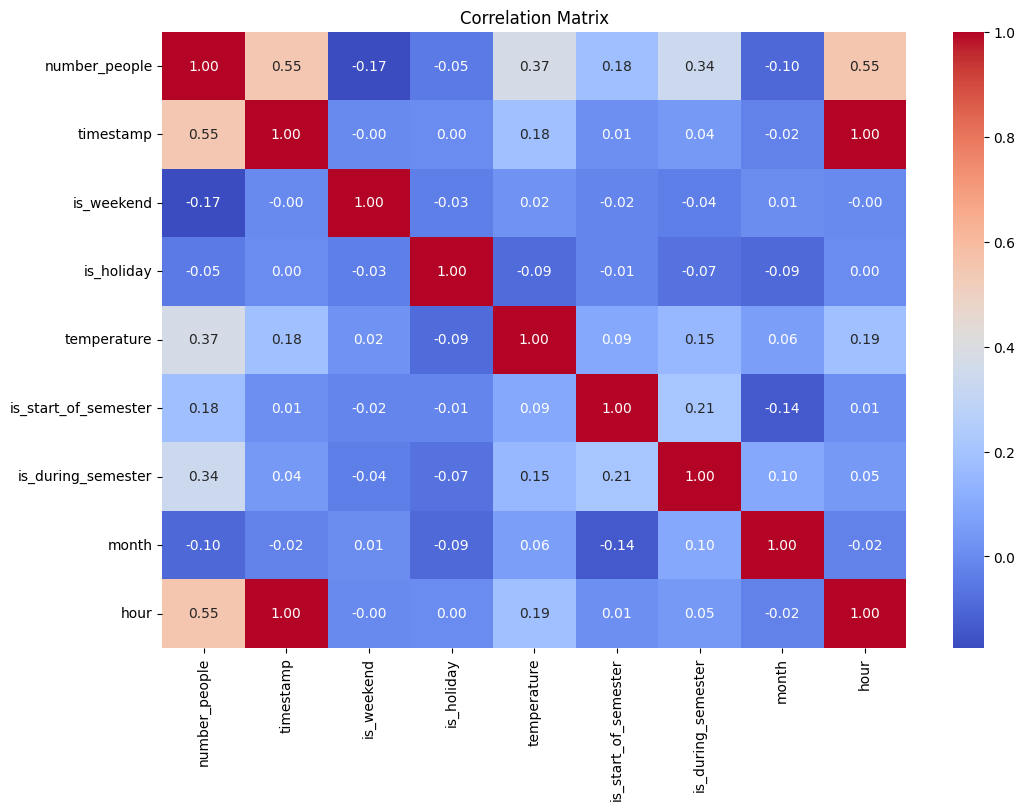

In [574]:
plt.figure(figsize=(12, 8))
numeric_df = df_equipment_util_pre.select_dtypes(include='number')  # Select only numeric columns
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



#### 4.B.5. Scatter plot of 'temperature' vs 'number_people'

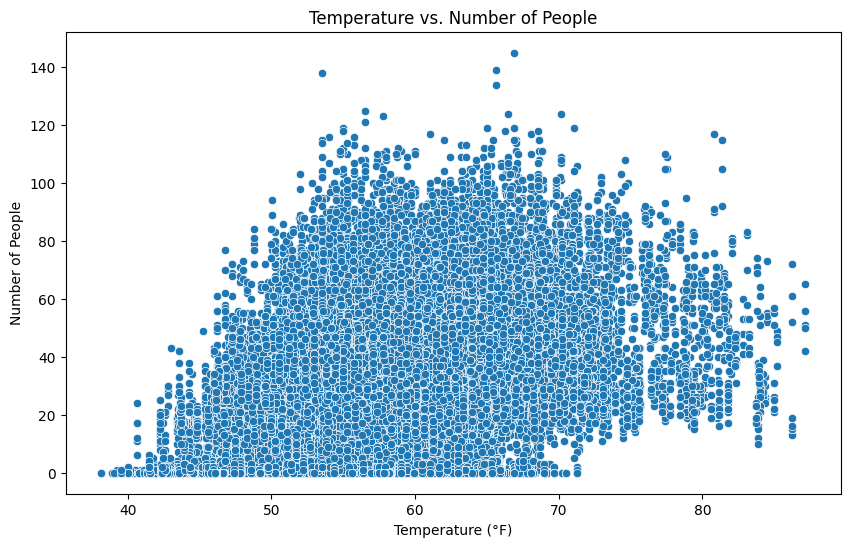

In [575]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='number_people', data=df_equipment_util_pre)
plt.title('Temperature vs. Number of People')
plt.xlabel('Temperature (°F)')
plt.ylabel('Number of People')
plt.show()

#### 4.B.6. Count plot of 'is_weekend'

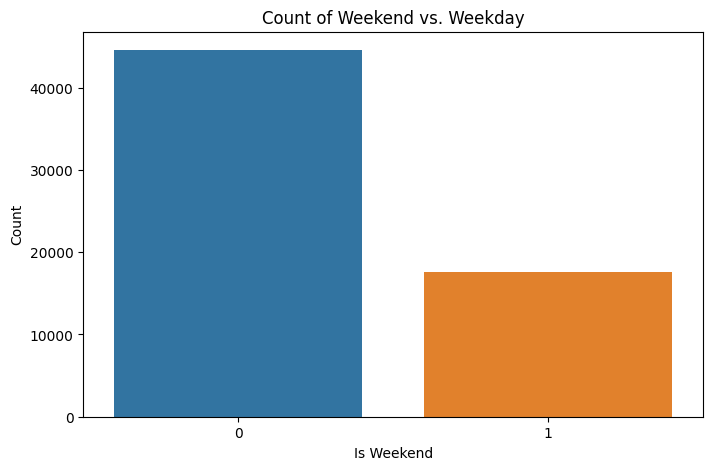

In [576]:

plt.figure(figsize=(8, 5))
sns.countplot(x='is_weekend', data=df_equipment_util_pre)
plt.title('Count of Weekend vs. Weekday')
plt.xlabel('Is Weekend')
plt.ylabel('Count')
plt.show()

#### 4.B.7. Grouping data by 'hour' and calculating the mean number of people

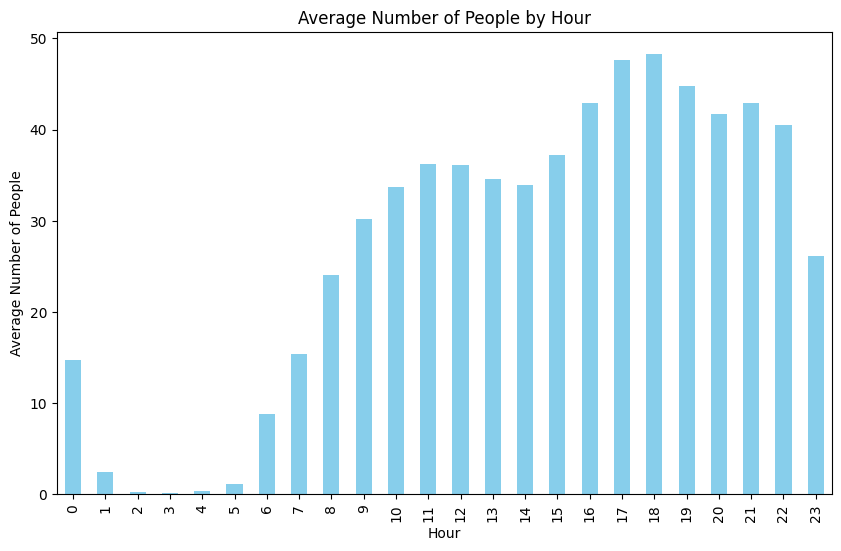

In [577]:
hourly_group = df_equipment_util_pre.groupby('hour')['number_people'].mean()
plt.figure(figsize=(10, 6))
hourly_group.plot(kind='bar', color='skyblue')
plt.title('Average Number of People by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Number of People')
plt.show()

## 5. Categorical Data encoding 

### 5.A. Group Class Utilization

In [578]:
df_class_util_pre['weight'].fillna(df_class_util_pre['weight'].median(), inplace=True)

C:\Temp\ipykernel_6660\2481580800.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_class_util_pre['weight'].fillna(df_class_util_pre['weight'].median(), inplace=True)


In [579]:
df_class_util_pre['days_before'] = df_class_util_pre['days_before'].str.replace(' days', '', regex=False).astype(int)

In [580]:
df_class_util_encoded = pd.get_dummies(df_class_util_pre, columns=['day_of_week', 'category'], drop_first=True,dtype=int)

In [581]:
time_mapping = {'AM': 0, 'PM': 1}
df_class_util_encoded['time'] = df_class_util_encoded['time'].map(time_mapping)

In [582]:
df_class_util_encoded

,booking_id,months_as_member,weight,days_before,time,attended,day_of_week_Tue,day_of_week_Wed,day_of_week_Thu,day_of_week_Fri,day_of_week_Sat,day_of_week_Sun,category_Cycling,category_HIIT,category_Strength,category_Yoga
0,1,17,79.56,8,1,0,0,1,0,0,0,0,0,0,1,0
1,2,10,79.01,2,0,0,0,0,0,0,0,0,0,1,0,0
2,3,16,74.53,14,0,0,0,0,0,0,0,1,0,0,1,0
3,4,5,86.12,10,0,0,0,0,0,1,0,0,1,0,0,0
4,5,15,69.29,8,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,0,0,0,0,0,1,0,0,0,1,0,0
1496,1497,29,89.55,2,0,0,0,0,0,0,0,0,0,0,1,0
1497,1498,9,87.38,4,0,0,1,0,0,0,0,0,0,1,0,0
1498,1499,34,68.64,14,0,0,0,0,0,0,0,1,0,0,0,0


### 5.B. Group Gym Equipment Utilization

In [583]:
df_equipment_util_encoded = pd.get_dummies(df_equipment_util_pre, columns=['day_of_week','month'], drop_first=True,dtype=int)

In [584]:
df_equipment_util_encoded['date'] = pd.to_datetime(df_equipment_util_encoded['date'], utc=True)

In [585]:
# Cyclical encoding for hours and weekdays
df_equipment_util_encoded['hour_sin'] = np.sin(2 * np.pi * df_equipment_util_encoded['hour'] / 24)
df_equipment_util_encoded['hour_cos'] = np.cos(2 * np.pi * df_equipment_util_encoded['hour'] / 24)

In [586]:
df_equipment_util_encoded['day'] = df_equipment_util_encoded['date'].dt.day
df_equipment_util_encoded['year'] = df_equipment_util_encoded['date'].dt.year

In [587]:
df_equipment_util_encoded.drop(columns = ['date','hour'],inplace = True)

 ## 6. Feature Analysis

 ### 6.A. Group Class utilization dataset

 ### Correlation and Chi-square Test

In [588]:
numeric_cols = df_class_util_pre.select_dtypes(include='number')
correlation = numeric_cols.corr()
print(correlation['attended'])

booking_id          0.026849
months_as_member    0.483314
weight             -0.284881
days_before         0.020706
attended            1.000000
Name: attended, dtype: float64


This p-value of time of the day feature is close to the common significance level of 0.05. While it's not below the threshold for statistical significance, it suggests a potential association between the time of day (AM/PM) and class attendance.

In [589]:
# For categorical features
from scipy.stats import chi2_contingency
for feature in ['day_of_week', 'category','time']:
    contingency_table = pd.crosstab(df_class_util_pre[feature], df_class_util_pre['attended'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f'Chi-square test for {feature}: p-value = {p}')

Chi-square test for day_of_week: p-value = 0.3443683659747918
Chi-square test for category: p-value = 0.5896017415664843
Chi-square test for time: p-value = 0.06430075296917508


### Feature Importance Analysis using Tree-based Models

In [590]:
from sklearn.model_selection import train_test_split

X = df_class_util_encoded.drop(columns=['attended'])
y = df_class_util_encoded['attended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [591]:
from sklearn.ensemble import RandomForestClassifier
importances = RandomForestClassifier().fit(X_train, y_train).feature_importances_

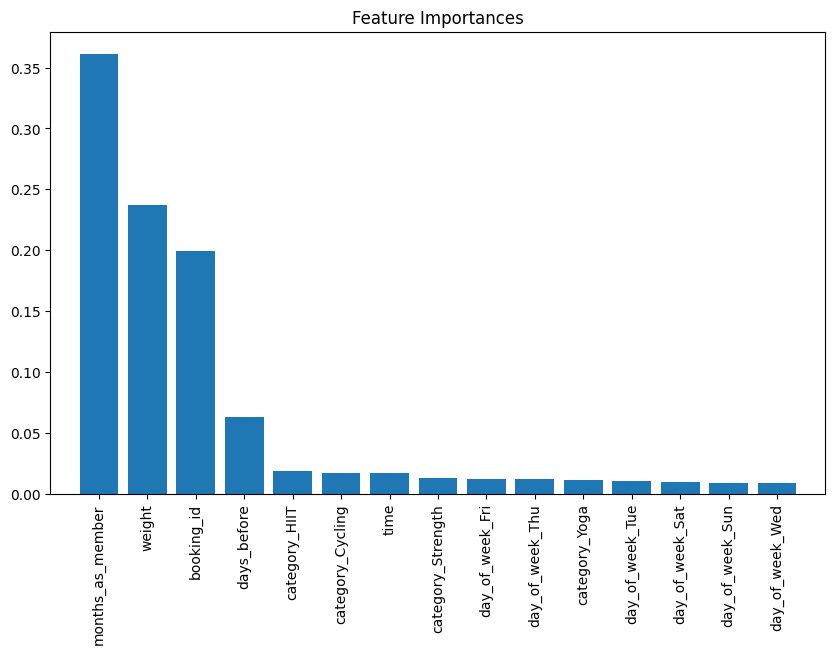

In [592]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature names (assumes feature_names is a list of feature names)
feature_names = X_train.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Variance Inflation Factor for Checking Multicollinearity between features

* booking_id (3.902744): Low VIF, indicating no significant multicollinearity for this feature.
* months_as_member (2.383969): Low VIF, suggesting no significant multicollinearity.
* weight (20.011770): High VIF, indicating severe multicollinearity. This feature is highly correlated with other features, which could be problematic.
* days_before (129.887587): Very high VIF, indicating extreme multicollinearity. This feature is likely to be highly correlated with other predictors.
* time (1.602183): Low VIF, indicating no significant multicollinearity.
* day_of_week_* (day_of_week_Tue - 2.667748): Low to moderate VIFs, suggesting that these features are not highly collinear individually.
* category_* (category_Cycling - 5.059412): Moderate VIFs, indicating that some collinearity might be present but not extreme.

In [593]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

X = df_class_util_encoded.drop(columns=['attended'])
vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

              feature         VIF
0          booking_id    3.902744
1    months_as_member    2.383969
2              weight   20.011770
3         days_before  129.887587
4                time    1.602183
5     day_of_week_Tue    2.667748
6     day_of_week_Wed    3.786306
7     day_of_week_Thu   11.207681
8     day_of_week_Fri   22.432697
9     day_of_week_Sat   22.415060
10    day_of_week_Sun   33.929839
11   category_Cycling    5.059412
12      category_HIIT    8.183315
13  category_Strength    3.456555
14      category_Yoga    2.495239


 ### 6.B. Group Gym Equipment utilization dataset

 ### Correlation and Chi-square Test

In [594]:
numeric_cols = df_equipment_util_pre.select_dtypes(include='number')
correlation = numeric_cols.corr()
print(correlation['number_people'])

number_people           1.000000
timestamp               0.550218
is_weekend             -0.173958
is_holiday             -0.048249
temperature             0.373327
is_start_of_semester    0.182683
is_during_semester      0.335350
month                  -0.097854
hour                    0.552049
Name: number_people, dtype: float64


* High P-Values (1.0): Features like day_of_week, is_weekend, is_holiday, and is_during_semester are not significantly associated with the target variable and might be redundant. Consider removing them.

* Moderate P-Values: is_start_of_semester (0.0628) and month (0.0851) show some association but are not statistically significant. They might still be useful, so consider further analysis.

* Low P-Value: date had a high p-value (0.4878), indicating it doesn’t provide useful information directly. Extract specific components like year, month, and day for better analysis.

In [595]:
for feature in ['date','day_of_week','is_weekend', 'is_holiday','is_start_of_semester','is_during_semester','month','hour']:
    contingency_table = pd.crosstab(df_equipment_util_pre[feature], df_class_util_pre['attended'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f'Chi-square test for {feature}: p-value = {p}')

Chi-square test for date: p-value = 0.48780717787840844
Chi-square test for day_of_week: p-value = 1.0
Chi-square test for is_weekend: p-value = 1.0
Chi-square test for is_holiday: p-value = 1.0
Chi-square test for is_start_of_semester: p-value = 0.0627553590101556
Chi-square test for is_during_semester: p-value = 1.0
Chi-square test for month: p-value = 0.08514741096131707
Chi-square test for hour: p-value = 0.21836422498628474


### Feature Importance using tree-based model

In [596]:
X = df_equipment_util_encoded.drop(columns=['number_people'])
y = df_equipment_util_encoded['number_people']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [597]:
importances_gym_util = RandomForestClassifier().fit(X_train, y_train).feature_importances_

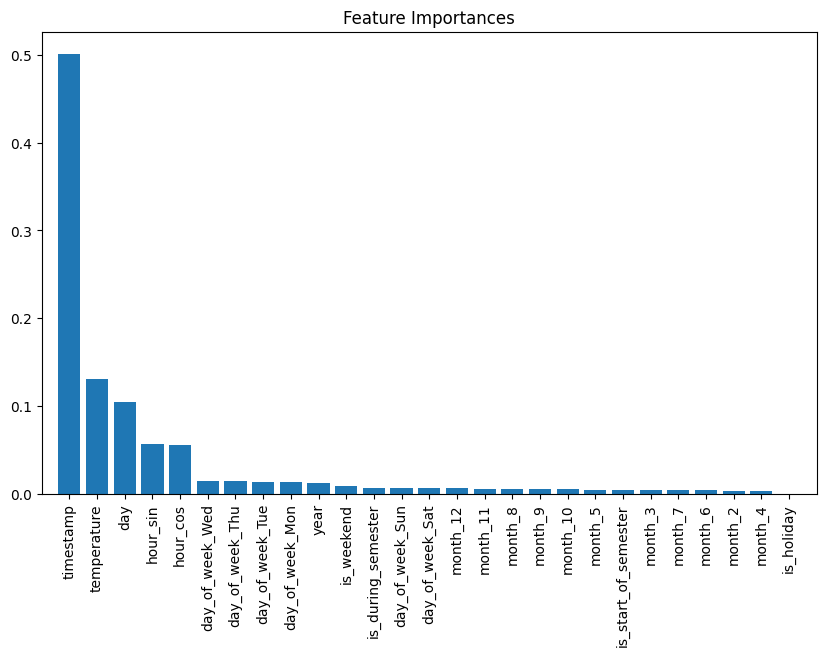

In [598]:
# Get feature names (assumes feature_names is a list of feature names)
feature_names = X_train.columns

# Sort features by importance
indices = np.argsort(importances_gym_util)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances_gym_util[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Variance Inflation Factor

High Feature Importances: hour, timestamp, and temperature are the most influential, which means these features have a significant impact on the model's predictions.

Infinite Values: The infinite values for day_of_week_Sat and day_of_week_Sun suggest there might be an issue with how these features are encoded or represented in the dataset.

In [599]:
X = df_equipment_util_encoded.drop(columns=['number_people'])
vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

c:\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                 feature         VIF
0              timestamp   11.061506
1             is_weekend         inf
2             is_holiday    1.076114
3            temperature  208.719393
4   is_start_of_semester    2.036266
5     is_during_semester   11.504006
6        day_of_week_Mon    2.038030
7        day_of_week_Sat         inf
8        day_of_week_Sun         inf
9        day_of_week_Thu    2.026533
10       day_of_week_Tue    2.053607
11       day_of_week_Wed    2.033386
12               month_2    2.858663
13               month_3    3.245947
14               month_4    2.500325
15               month_5    2.596308
16               month_6    2.609635
17               month_7    2.758847
18               month_8    3.225223
19               month_9    4.518443
20              month_10    5.470221
21              month_11    4.735782
22              month_12    3.663936
23              hour_sin    2.695229
24              hour_cos    1.220528
25                   day    4.461526
2

 ## 7. Scaling features

 ### 7.A. Group Class utilization dataset

In [600]:
scaler = StandardScaler()
columns_to_scale = ['booking_id', 'months_as_member', 'weight', 'days_before']

In [601]:
df_class_util_scaled = df_class_util_encoded.copy()  # Make a copy of the original DataFrame
df_class_util_scaled[columns_to_scale] = scaler.fit_transform(df_class_util_scaled[columns_to_scale])

In [602]:
df_class_util_scaled

,booking_id,months_as_member,weight,days_before,time,attended,day_of_week_Tue,day_of_week_Wed,day_of_week_Thu,day_of_week_Fri,day_of_week_Sat,day_of_week_Sun,category_Cycling,category_HIIT,category_Strength,category_Yoga
0,-1.728375,0.105702,-0.239296,-0.086464,1,0,0,1,0,0,0,0,0,0,1,0
1,-1.726067,-0.435759,-0.282628,-1.558654,0,0,0,0,0,0,0,0,0,1,0,0
2,-1.723759,0.028350,-0.635584,1.385727,0,0,0,0,0,0,0,1,0,0,1,0
3,-1.721450,-0.822516,0.277533,0.404267,0,0,0,0,0,1,0,0,1,0,0,0
4,-1.719142,-0.049001,-1.048417,-0.086464,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1.722599,0.415107,-0.243235,0.404267,0,0,0,0,0,1,0,0,0,1,0,0
1496,1.724907,1.033919,0.547766,-1.558654,0,0,0,0,0,0,0,0,0,0,1,0
1497,1.727216,-0.513110,0.376802,-1.067924,0,0,1,0,0,0,0,0,0,1,0,0
1498,1.729524,1.420676,-1.099628,1.385727,0,0,0,0,0,0,0,1,0,0,0,0


In [603]:
df_equipment_util_scaled = df_equipment_util_encoded.copy()  # Make a copy of the original DataFrame
df_equipment_util_scaled[['temperature']] = scaler.fit_transform(df_equipment_util_scaled[['temperature']])

In [604]:
df_equipment_util_scaled

,number_people,timestamp,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,...,month_7,month_8,month_9,month_10,month_11,month_12,hour_sin,hour_cos,day,year
0,37,61211,0,0,2.090274,0,0,0,0,0,...,0,1,0,0,0,0,-0.965926,-0.258819,15,2015
1,45,32414,0,0,-0.351011,0,1,0,0,0,...,0,0,0,0,1,0,0.707107,-0.707107,13,2015
2,45,33612,0,0,-0.351011,0,1,0,0,0,...,0,0,0,0,1,0,0.707107,-0.707107,13,2015
3,43,34213,0,0,-0.351011,0,1,0,0,0,...,0,0,0,0,1,0,0.707107,-0.707107,13,2015
4,50,34813,0,0,-0.351011,0,1,0,0,0,...,0,0,0,0,1,0,0.707107,-0.707107,13,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62179,45,34704,0,0,1.770469,0,1,0,0,0,...,0,0,1,0,0,0,0.707107,-0.707107,7,2016
62180,44,35306,0,0,1.770469,0,1,0,0,0,...,0,0,1,0,0,0,0.707107,-0.707107,7,2016
62181,37,35908,0,0,1.770469,0,1,0,0,0,...,0,0,1,0,0,0,0.707107,-0.707107,7,2016
62182,40,32294,0,0,1.043783,0,1,0,0,0,...,0,0,1,0,0,0,0.866025,-0.500000,7,2016


# 8. Choose appropriate machine learning algorithms


 ### 8.A. Group Class utilization dataset

In [605]:
# # Binarize or categorize 'weight' and 'days_before'
df_class_util_scaled['weight_binned'] = pd.cut(df_class_util_scaled['weight'], bins=[0, 60, 80, 100, 150], labels=[0, 1, 2, 3])
df_class_util_scaled['days_before_binned'] = pd.cut(df_class_util_scaled['days_before'], bins=[0, 2, 7, 14, 30], labels=[0, 1, 2, 3])


In [606]:
df_class_util_scaled.isnull().sum()

booking_id              0
months_as_member        0
weight                  0
days_before             0
time                    0
attended                0
day_of_week_Tue         0
day_of_week_Wed         0
day_of_week_Thu         0
day_of_week_Fri         0
day_of_week_Sat         0
day_of_week_Sun         0
category_Cycling        0
category_HIIT           0
category_Strength       0
category_Yoga           0
weight_binned         841
days_before_binned    731
dtype: int64

In [607]:
# Fill NaN values with the most frequent value (mode)
most_frequent_weight = df_class_util_scaled['weight_binned'].mode()[0]
df_class_util_scaled['weight_binned'] = df_class_util_scaled['weight_binned'].fillna(most_frequent_weight)
most_frequent_days_before = df_class_util_scaled['days_before_binned'].mode()[0]
df_class_util_scaled['days_before_binned'] = df_class_util_scaled['days_before_binned'].fillna(most_frequent_days_before)


In [608]:
df_class_util_scaled.columns

Index(['booking_id', 'months_as_member', 'weight', 'days_before', 'time',
       'attended', 'day_of_week_Tue', 'day_of_week_Wed', 'day_of_week_Thu',
       'day_of_week_Fri', 'day_of_week_Sat', 'day_of_week_Sun',
       'category_Cycling', 'category_HIIT', 'category_Strength',
       'category_Yoga', 'weight_binned', 'days_before_binned'],
      dtype='object')

In [609]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [610]:
# Selected features based on analysis
# selected_features = ['months_as_member', 'weight_binned', 'days_before_binned', 'time', 'category_HIIT', 'category_Cycling', 'day_of_week_Tue', 'day_of_week_Wed', 'day_of_week_Thu',
#        'day_of_week_Fri', 'day_of_week_Sat', 'day_of_week_Sun','months_as_member_category']


In [611]:
# Selected features based on analysis
selected_features = ['months_as_member', 'time','weight_binned','days_before_binned', 'category_HIIT', 'category_Cycling', 'day_of_week_Tue', 'day_of_week_Wed', 'day_of_week_Thu',
       'day_of_week_Fri', 'day_of_week_Sat', 'day_of_week_Sun']


In [612]:
# Prepare the data

# X = df_class_util_scaled.drop(columns=['attended'])
X =  df_class_util_scaled[selected_features]
y = df_class_util_scaled['attended']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [613]:
X.columns

Index(['months_as_member', 'time', 'weight_binned', 'days_before_binned',
       'category_HIIT', 'category_Cycling', 'day_of_week_Tue',
       'day_of_week_Wed', 'day_of_week_Thu', 'day_of_week_Fri',
       'day_of_week_Sat', 'day_of_week_Sun'],
      dtype='object')

In [614]:
#Initialize models
models_classification = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}


Logistic Regression Accuracy: 0.76


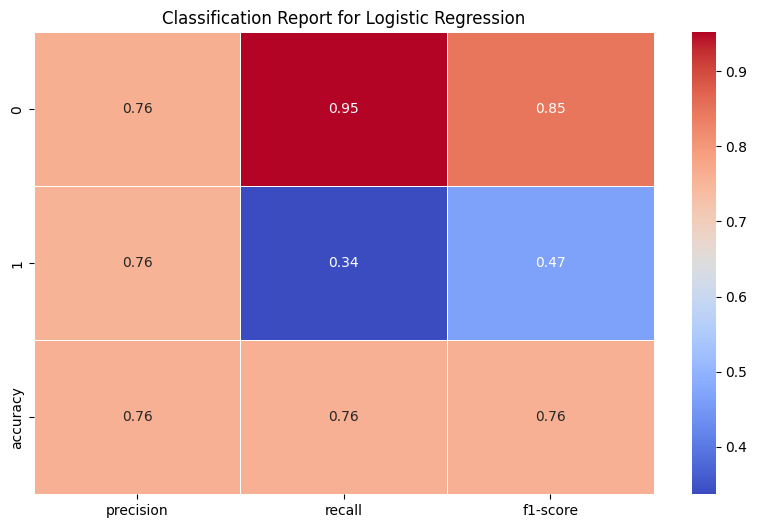

Decision Tree Accuracy: 0.71


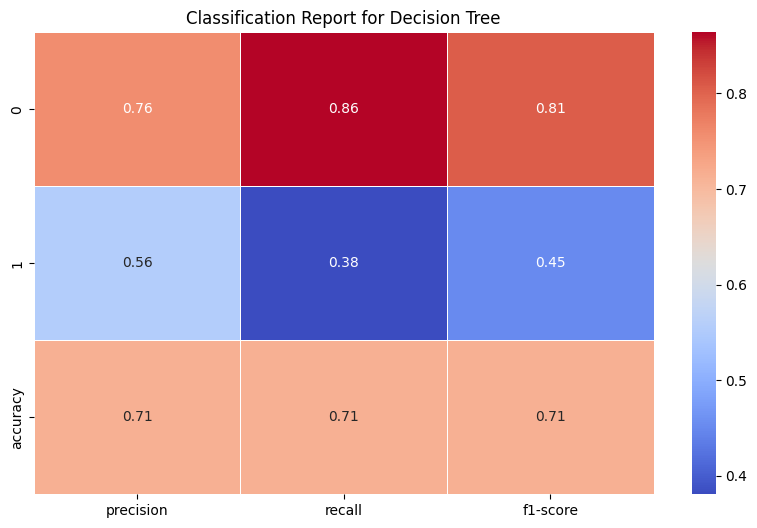

Random Forest Accuracy: 0.71


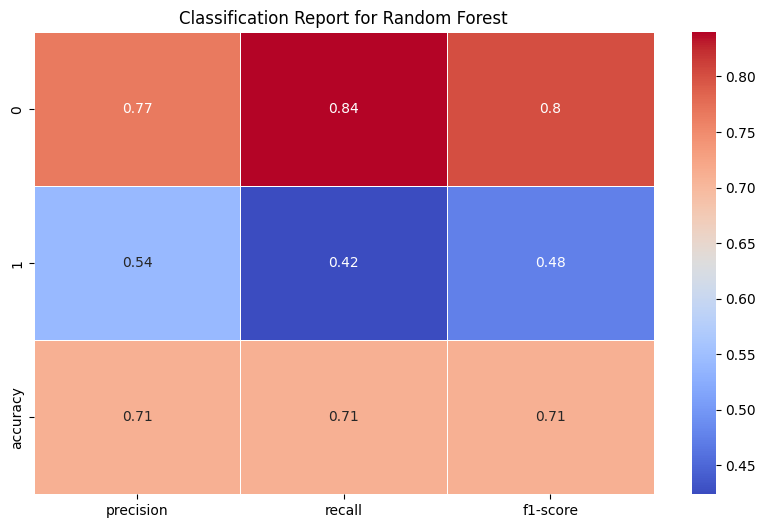

Gradient Boosting Accuracy: 0.77


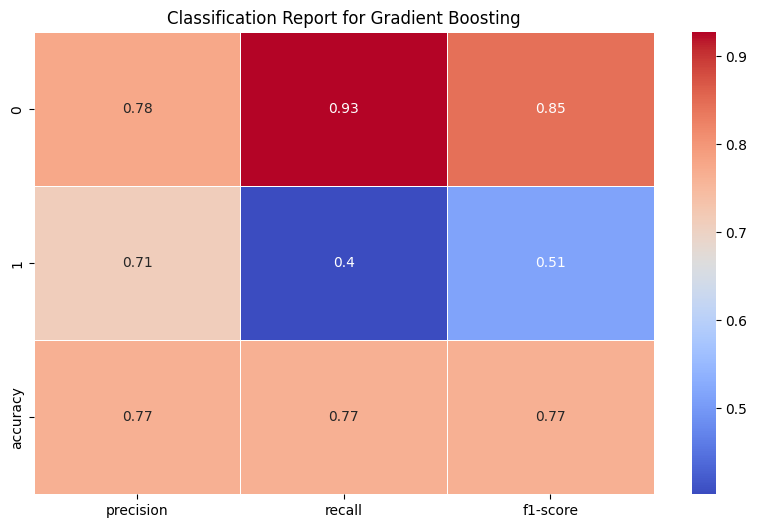

SVM Accuracy: 0.77


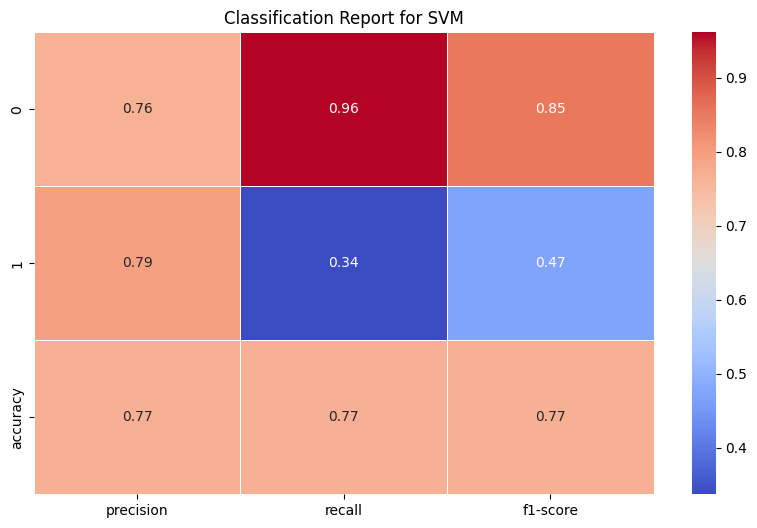

KNN Accuracy: 0.73


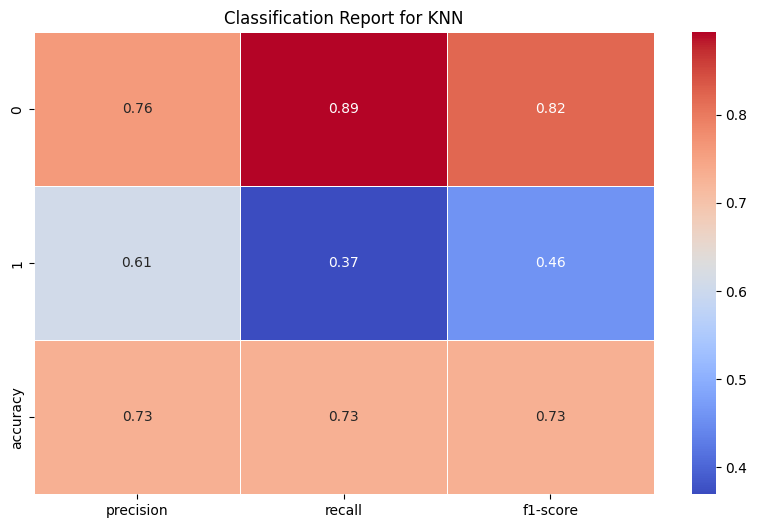


Model Comparison:
                     Accuracy
Logistic Regression  0.761745
Decision Tree        0.714765
Random Forest        0.711409
Gradient Boosting    0.765101
SVM                  0.768456
KNN                  0.731544


In [615]:
# # Evaluate models
results = {}
for model_name, model in models_classification.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    report = classification_report(y_test, y_pred,output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df = report_df.drop(['macro avg', 'weighted avg'])
    report_df = report_df.drop(columns=['support'])
    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title(f'Classification Report for {model_name}')
    plt.show()

# Display results
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
print("\nModel Comparison:")
print(results_df)

The table above shows that the SVM model has the highest accuracy, followed by the Gradient Boosting and Logistic Regression models.

#### Hyperparameter Tuning and Cross-Validation for SVM

In [616]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Define the SVM classifier model
svm_model = SVC(probability=True)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': ['scale', 'auto'],       # Kernel coefficient
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Type of kernel
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=svm_model,
                           param_grid=param_grid,
                           scoring='accuracy',  # Use accuracy as the scoring metric
                           cv=5,                # Number of cross-validation folds
                           n_jobs=-1,           # Use all available cores
                           verbose=2)           # Verbosity level

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Best score (accuracy) from GridSearchCV
best_score = grid_search.best_score_
print(f"Best score (Accuracy): {best_score}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop(['macro avg', 'weighted avg'])
report_df = report_df.drop(columns=['support'])

print("\nSVM Classifier Performance with Best Parameters:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report_df)
print("Confusion Matrix:")
print(conf_matrix)

# Cross-validation scores
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores):.2f}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best score (Accuracy): 0.7779527000673687

SVM Classifier Performance with Best Parameters:
Accuracy: 0.76
Classification Report:
          precision    recall  f1-score
0          0.758621  0.961165  0.847966
1          0.783784  0.315217  0.449612
accuracy   0.761745  0.761745  0.761745
Confusion Matrix:
[[198   8]
 [ 63  29]]

Cross-Validation Accuracy Scores: [0.75630252 0.80672269 0.75630252 0.80672269 0.76371308]
Mean CV Accuracy: 0.78
Standard Deviation of CV Accuracy: 0.02


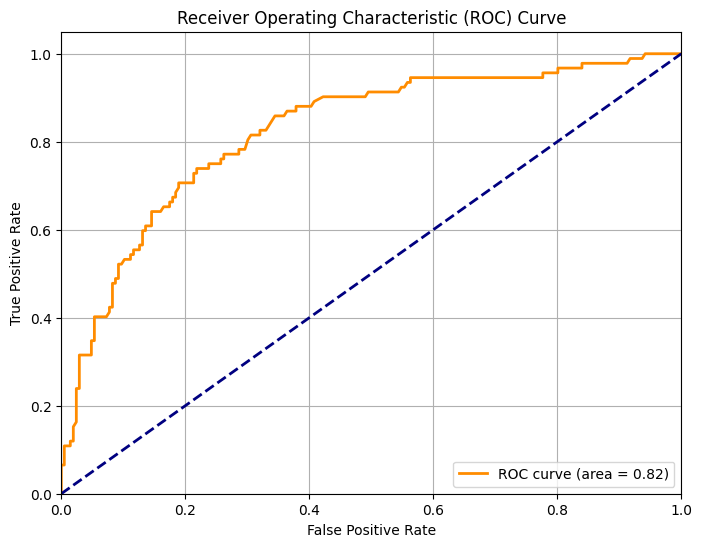

In [617]:
from sklearn.metrics import roc_curve, auc
# Predict probabilities on test set
y_prob = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


 ### 8.B. Group Gym Equipment utilization dataset

In [618]:
df_equipment_util_scaled.columns

Index(['number_people', 'timestamp', 'is_weekend', 'is_holiday', 'temperature',
       'is_start_of_semester', 'is_during_semester', 'day_of_week_Mon',
       'day_of_week_Sat', 'day_of_week_Sun', 'day_of_week_Thu',
       'day_of_week_Tue', 'day_of_week_Wed', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'hour_sin', 'hour_cos', 'day', 'year'],
      dtype='object')

In [619]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


In [620]:
# Select relevant features based on correlation and chi-square test results
selected_features_ge = ['hour_sin',  'hour_cos','temperature',  'is_start_of_semester',   'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12' ]

In [621]:
X =  df_equipment_util_scaled[selected_features_ge]
y = df_equipment_util_scaled['number_people']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [622]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVM': SVR(),
    'KNN': KNeighborsRegressor()
}


Linear Regression Performance:
Mean Absolute Error: 12.70
Mean Squared Error: 270.08
R² Score: 0.48



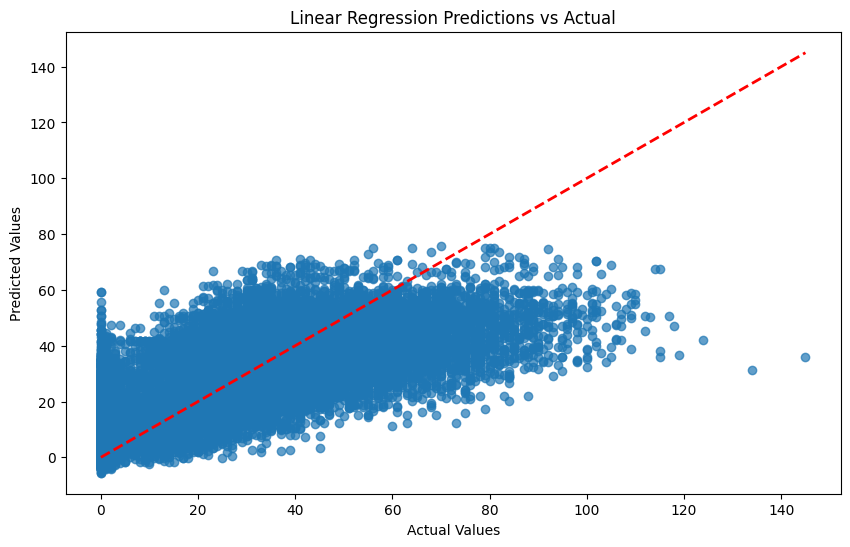

Decision Tree Performance:
Mean Absolute Error: 4.76
Mean Squared Error: 52.55
R² Score: 0.90



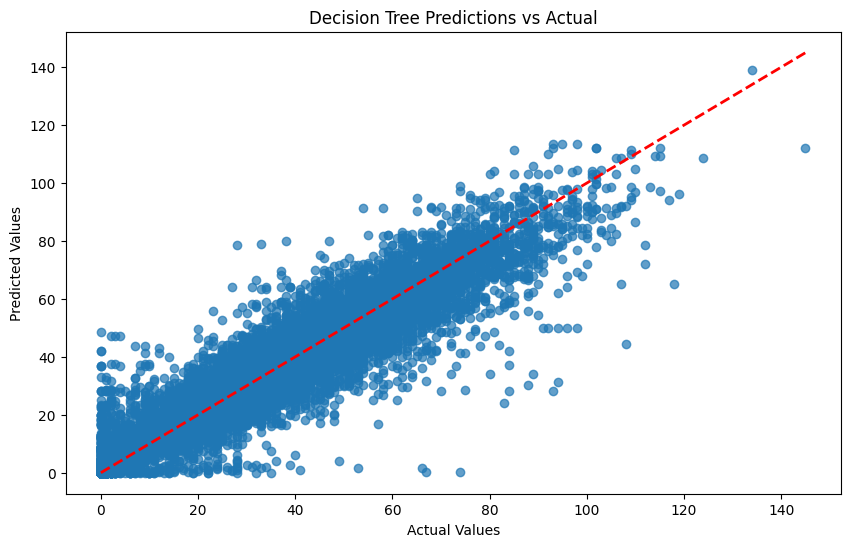

Random Forest Performance:
Mean Absolute Error: 4.82
Mean Squared Error: 52.82
R² Score: 0.90



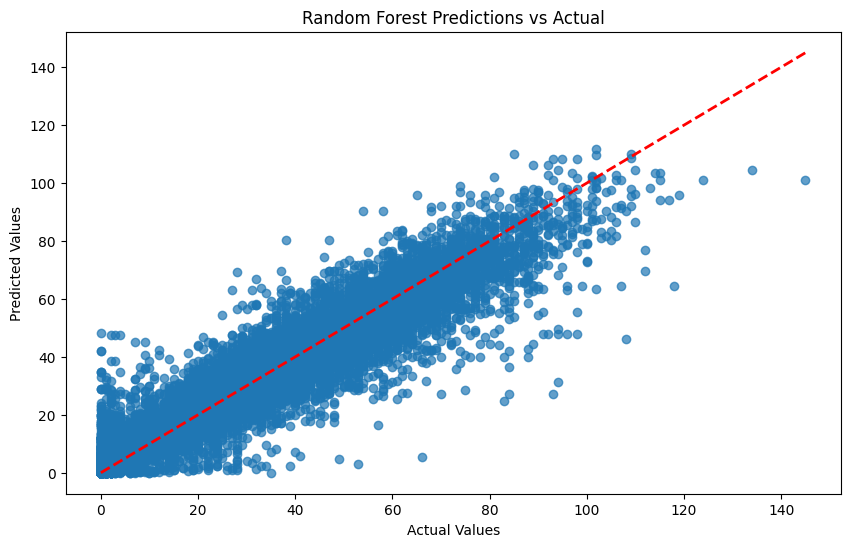

Gradient Boosting Performance:
Mean Absolute Error: 10.36
Mean Squared Error: 193.66
R² Score: 0.63



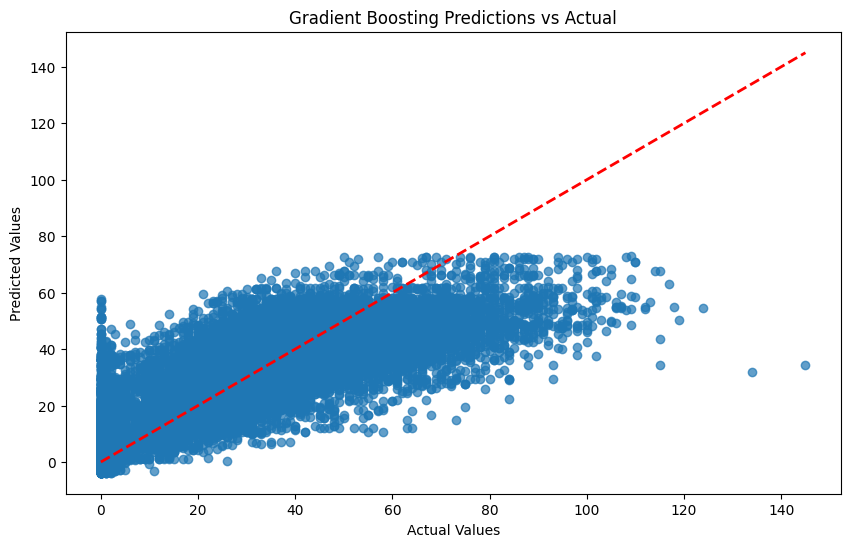

SVM Performance:
Mean Absolute Error: 9.78
Mean Squared Error: 190.63
R² Score: 0.63



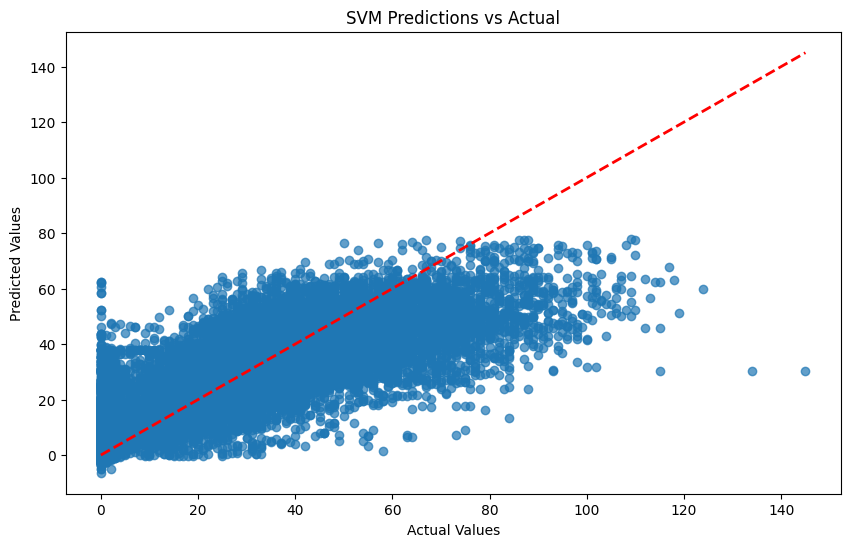

KNN Performance:
Mean Absolute Error: 6.60
Mean Squared Error: 95.17
R² Score: 0.82



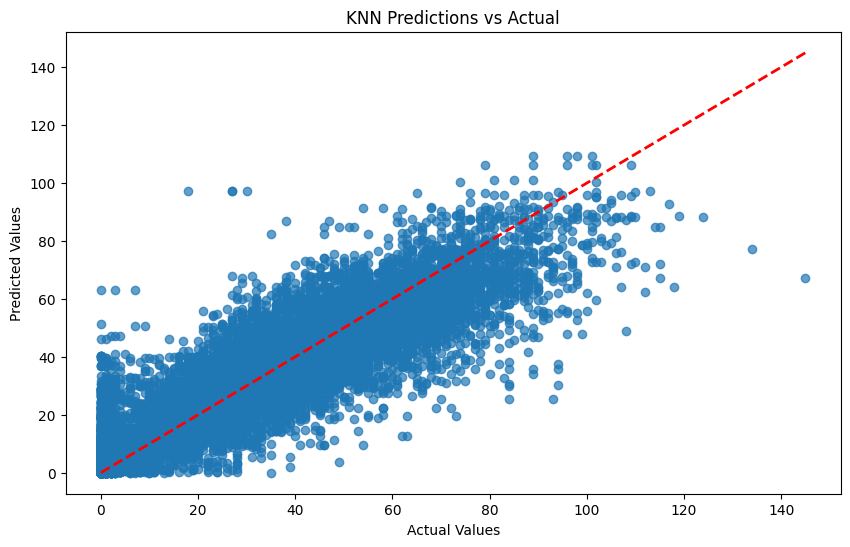


Model Comparison:
                         MAE         MSE        R²
Linear Regression  12.696899  270.082554  0.478993
Decision Tree       4.757445   52.554906  0.898618
Random Forest       4.820533   52.822807  0.898101
Gradient Boosting  10.356715  193.660745  0.626415
SVM                 9.784774  190.629968  0.632262
KNN                 6.597256   95.171085  0.816409


In [623]:
# Evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {'MAE': mae, 'MSE': mse, 'R²': r2}
    
    print(f"{model_name} Performance:")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.2f}\n")
    
    # Plot predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} Predictions vs Actual')
    plt.show()

# Display results
results_df = pd.DataFrame.from_dict(results, orient='index')
print("\nModel Comparison:")
print(results_df)

Decision Tree and Random Forest are the best-performing models based on the provided metrics, especially in terms of R² score, MAE, and MSE. 